In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.ticker import FuncFormatter
import seaborn as sns

plt.style.use('fivethirtyeight')

In [41]:
# Specify the directory containing the CSV files
directory = 'Desktop/Projects/sales_data_analysis/Sales_Data'

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each CSV file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        # Read the CSV file into a DataFrame and append it to the list
        df = pd.read_csv(os.path.join(directory, filename))
        dfs.append(df)

# Concatenate the DataFrames into one
combined_sales_data = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
combined_sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [42]:
def main():
    # Assuming you have a DataFrame named combined_sales_data
    
    # Example DataFrame
    # combined_sales_data = pd.DataFrame(...)  # Your actual DataFrame

    filename = 'combined_sales_data.csv'
    combined_sales_data.to_csv(filename, index=False)  # Save DataFrame to CSV without row indices
    print(f"DataFrame saved to '{filename}'.")

if __name__ == "__main__":
    main()

DataFrame saved to 'combined_sales_data.csv'.


In [43]:
#Removing the NaN value from certain columns
cleaned_df = combined_sales_data.dropna()

#Dropping the previous indexes and setting new ones
cleaned_df = cleaned_df.reset_index(drop=True)

cleaned_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186301,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186302,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [44]:
# Identify rows that contain column headers
header_rows = cleaned_df.iloc[1:].apply(lambda row: row.str.contains('Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address'), axis=1).any(axis=1)

# Filter out rows containing additional headers. Concatenating the first row (assumed to be the main header) with the rows that do not contain additional headers.
cleaned_df = pd.concat([cleaned_df.iloc[:1], cleaned_df.iloc[1:][~header_rows]]).reset_index(drop=True)
cleaned_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
185946,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
185947,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
185948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [45]:
#Convering the string data under 'Quantity Ordered' to numeric to prepare for calculation. errors='coerce' deals with the resulting errors.
cleaned_df['Quantity Ordered'] = pd.to_numeric(cleaned_df['Quantity Ordered'], errors='coerce')

# Convert the 'Price Each' column to numeric.
cleaned_df['Price Each'] = pd.to_numeric(cleaned_df['Price Each'], errors='coerce')

#Creating a new column 'Total Sales' to store the new value from the calculation
cleaned_df['Total Sales'] = cleaned_df['Quantity Ordered'] * cleaned_df['Price Each']

#Rearranging the columns
cleaned_df = cleaned_df[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Total Sales', 'Order Date', 'Purchase Address']]

cleaned_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Total Sales,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [46]:
#Converting 'Order Date' string to date time using the function pd.to_datetime
cleaned_df['Order Date'] = pd.to_datetime(cleaned_df['Order Date'], format = '%m/%d/%y %H:%M')

cleaned_df

,Order ID,Product,Quantity Ordered,Price Each,Total Sales,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
185946,259354,iPhone,1,700.00,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
185947,259355,iPhone,1,700.00,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
185948,259356,34in Ultrawide Monitor,1,379.99,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


1. Getting the month with the best and worst sales

In [47]:
#Getting the monthly sales
#Extracting the month from 'Order Date'
cleaned_df['Month'] = cleaned_df['Order Date'].dt.month

#Group the data by month and calculate total sales for each month
monthly_sales = cleaned_df.groupby('Month')['Total Sales'].sum()

#Calculating to see which month had the best sales and by how much
best_month = monthly_sales.idxmax()
best_sales = monthly_sales.max()

#Calculating to see which month had the worst sales and by how much
worst_month = monthly_sales.idxmin()
worst_sales = monthly_sales.min()

print("Best Month for Sales:", best_month, "with Total Sales:", best_sales)
print("Best Month for Sales:", worst_month, "with Total Sales:", worst_sales)

Best Month for Sales: 12 with Total Sales: 4613443.34
Best Month for Sales: 1 with Total Sales: 1822256.73


In [48]:
monthly_sales

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Total Sales, dtype: float64

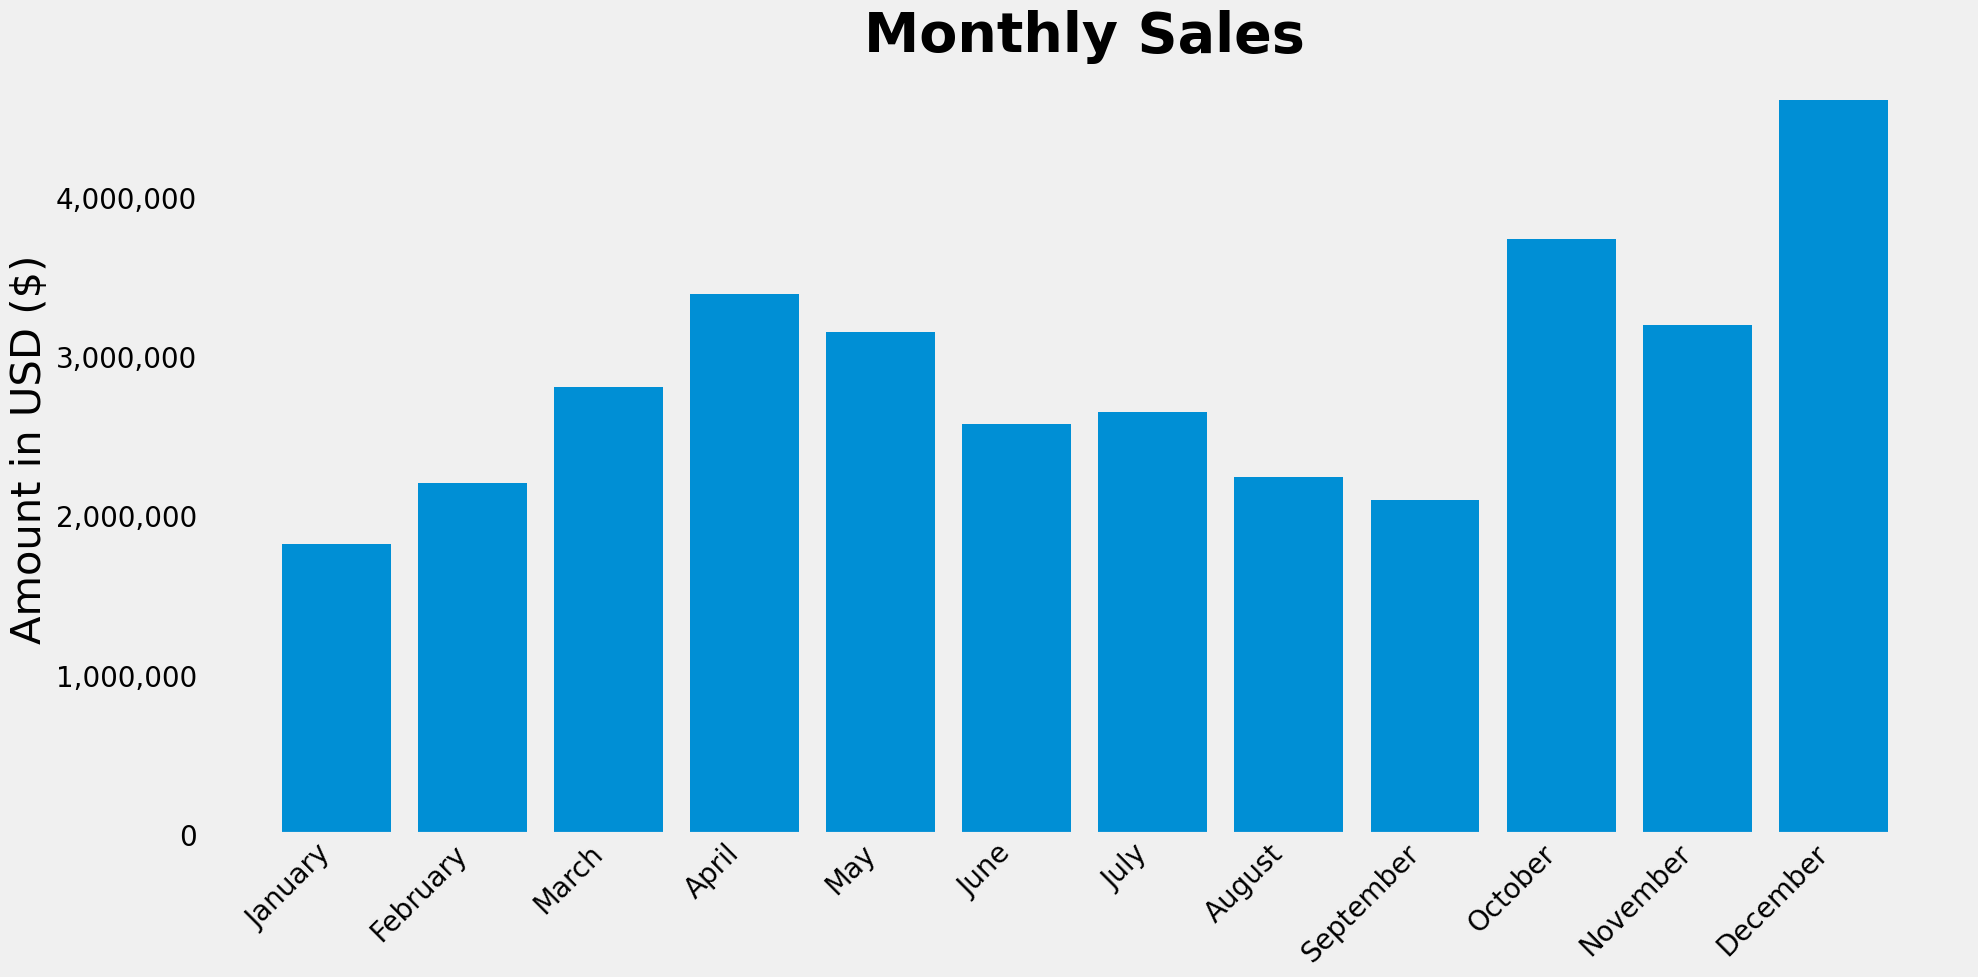

In [49]:
#Plotting the graph
Month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#specifying the width and height of the figure that has the graph so that the graph can have enough space to be visible
plt.figure(figsize=(20,10))
plt.bar(Month, monthly_sales)

# Remove the x-axis ticks
#plt.tick_params(axis='x', bottom=False)

#Rotating the ticks for better visibilty
plt.xticks(rotation=45, ha='right', fontsize = 20)
plt.yticks(fontsize = 20)

# Formatting y-axis ticks to display full numbers
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Adding labels and title
plt.ylabel('Amount in USD ($)', fontsize = 30)
plt.title('Monthly Sales', fontsize = 40, fontweight = 'bold')

#Adjusting the layout for better readability. It a very good practice.
plt.tight_layout()

plt.grid(False)

plt.show()

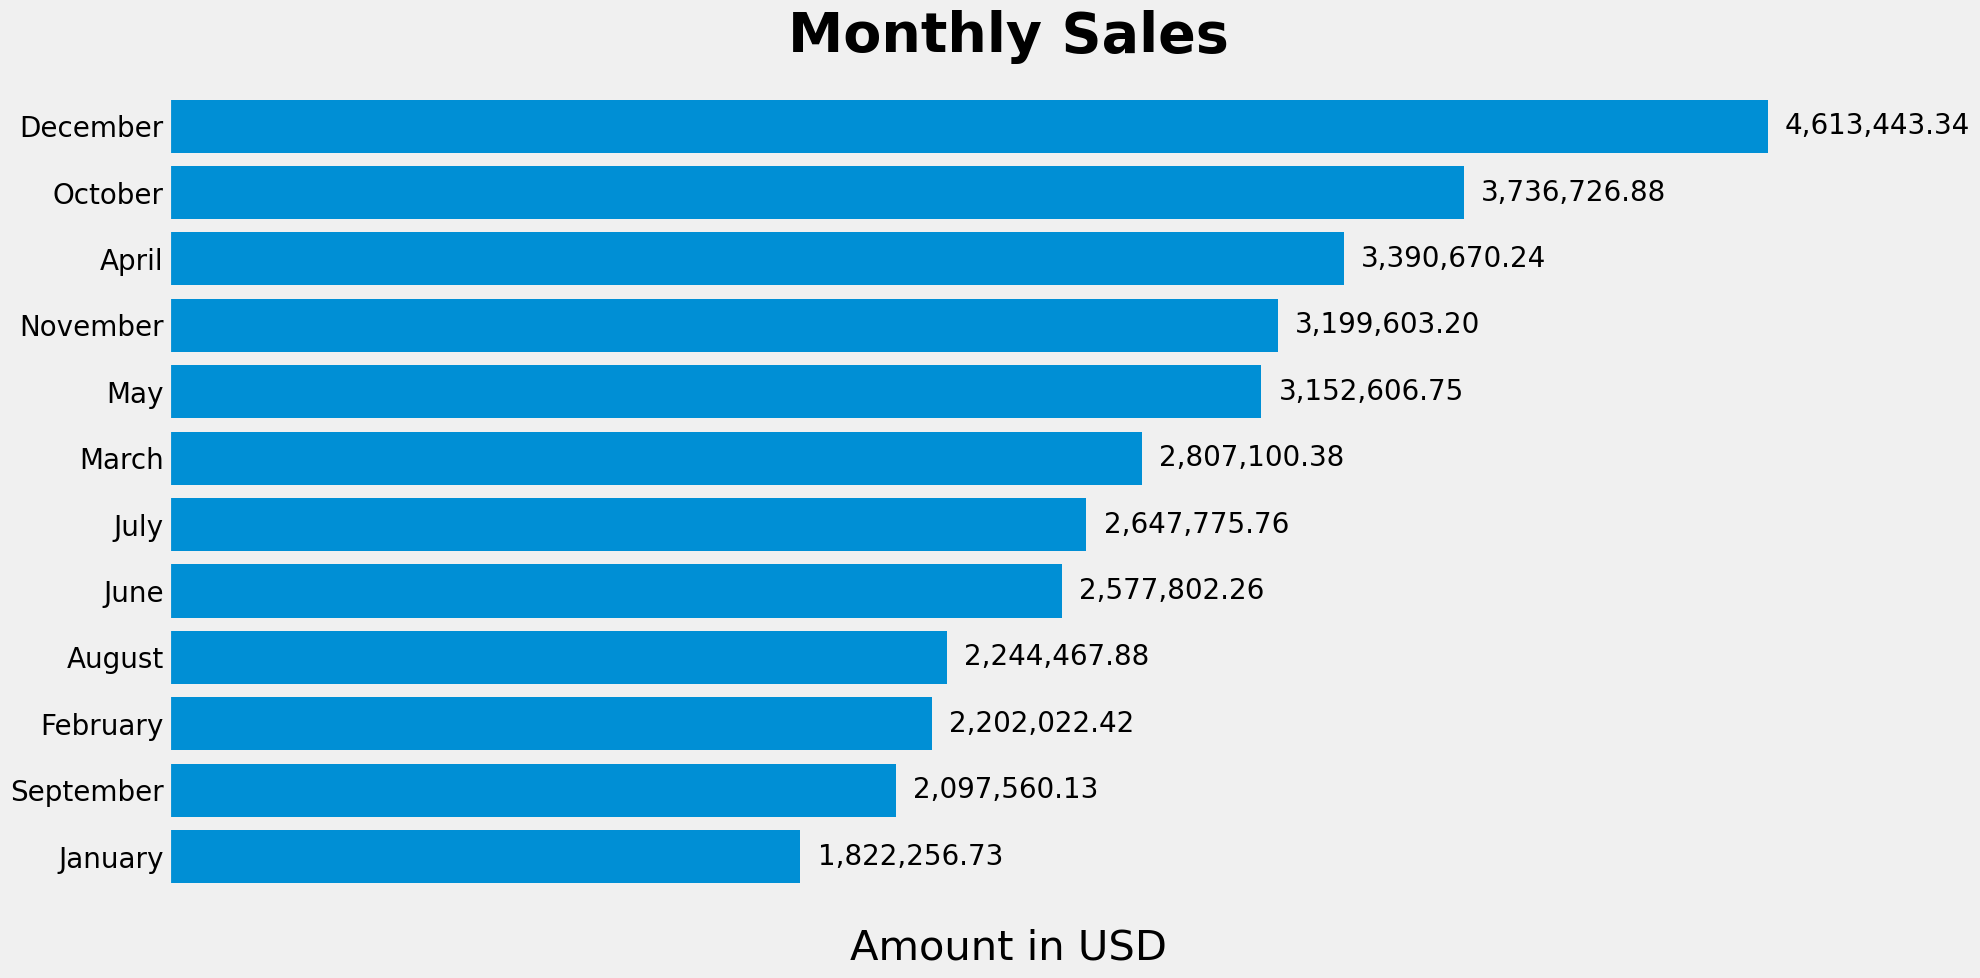

In [50]:
# Data
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sales = [1822256.73, 2202022.42, 2807100.38, 3390670.24, 3152606.75, 2577802.26, 2647775.76, 2244467.88, 2097560.13, 3736726.88, 3199603.20, 4613443.34]

# Sort the data by sales amount in descending order
sorted_data = sorted(zip(sales, months), reverse=False)

# Extract sorted sales and months
sorted_sales = [sale for sale, _ in sorted_data]
sorted_months = [month for _, month in sorted_data]

# Plotting the graph
plt.figure(figsize=(20, 10))

# Plotting the horizontal bar graph using 'barh'
bars = plt.barh(sorted_months, sorted_sales)

# Placing the sales amount at the end of each bar
for bar, sale in zip(bars, sorted_sales):
    plt.text(bar.get_width() + 50000, bar.get_y() + bar.get_height()/2, f'{sale:,.2f}', ha='left', va='center', fontsize=20)

plt.xlabel('Amount in USD', fontsize = 30)
plt.title('Monthly Sales',  fontsize = 40, fontweight = 'bold')

plt.xticks([])
plt.yticks(fontsize = 20)

# Remove the x-axis pointers
plt.tick_params(axis='x', bottom=False)

plt.tight_layout()

plt.grid(False)

plt.show()

In [84]:
# Get the default blue color
default_blue = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]

print("Default blue color:", default_blue)

Default blue color: #008fd5


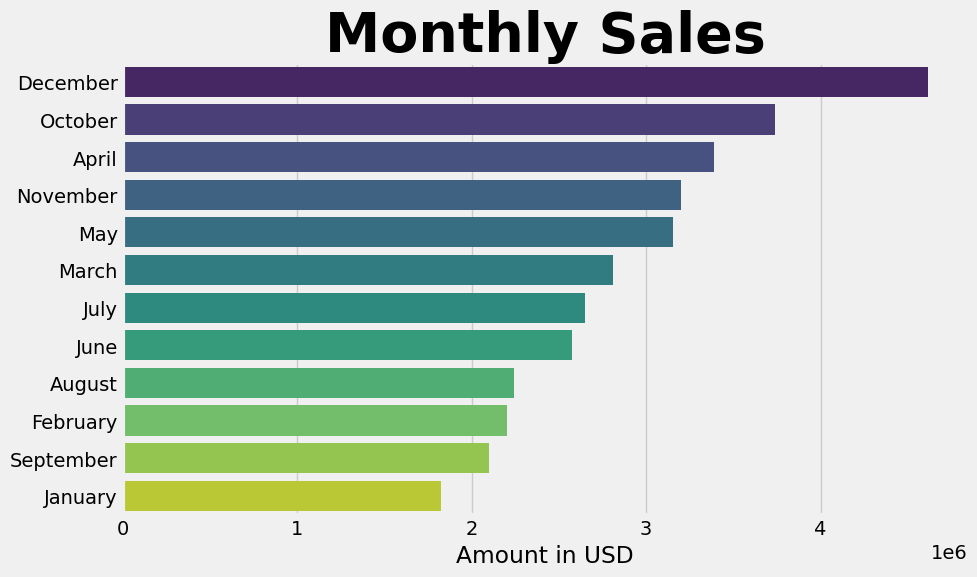

In [51]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sales = [1822256.73, 2202022.42, 2807100.38, 3390670.24, 3152606.75, 2577802.26, 2647775.76, 2244467.88, 2097560.13, 3736726.88, 3199603.20, 4613443.34]

# Create DataFrame
df = pd.DataFrame({'Month': months, 'Sales': sales})

# Sort DataFrame by Sales
sorted_df = df.sort_values(by='Sales', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Month', data=sorted_df, palette='viridis')
plt.xlabel('Amount in USD')
#Removing the Y label
plt.ylabel('')
plt.title('Monthly Sales', fontsize = 40, fontweight = 'bold')
plt.tight_layout()
plt.show()

In [52]:
cleaned_df['Purchase Address']

0                    917 1st St, Dallas, TX 75001
1               682 Chestnut St, Boston, MA 02215
2            669 Spruce St, Los Angeles, CA 90001
3            669 Spruce St, Los Angeles, CA 90001
4               333 8th St, Los Angeles, CA 90001
                           ...                   
185945     840 Highland St, Los Angeles, CA 90001
185946    216 Dogwood St, San Francisco, CA 94016
185947       220 12th St, San Francisco, CA 94016
185948     511 Forest St, San Francisco, CA 94016
185949     250 Meadow St, San Francisco, CA 94016
Name: Purchase Address, Length: 185950, dtype: object

In [53]:
# Split the 'Purchase Address' column by comma
split_address = cleaned_df['Purchase Address'].str.split(',')

# Extract the second and third elements after splitting and strip leading/trailing whitespace
city_state = split_address.str[1].str.strip() + ', ' + split_address.str[2].str.strip()

# Assign the result back to the 'City' column
cleaned_df['City'] = city_state

cleaned_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Total Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,"Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,"Boston, MA 02215"
2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,"Los Angeles, CA 90001"


2. Getting the city with the most Purchases

In [54]:
#Checking the city with the most purchases. '.value_counts()' checks the string that appears the most and it returns with the how many times it appears.
cleaned_df['City'].value_counts()

City
San Francisco, CA 94016    44732
Los Angeles, CA 90001      29605
New York City, NY 10001    24876
Boston, MA 02215           19934
Atlanta, GA 30301          14881
Dallas, TX 75001           14820
Seattle, WA 98101          14732
Portland, OR 97035         10010
Austin, TX 73301            9905
Portland, ME 04101          2455
Name: count, dtype: int64

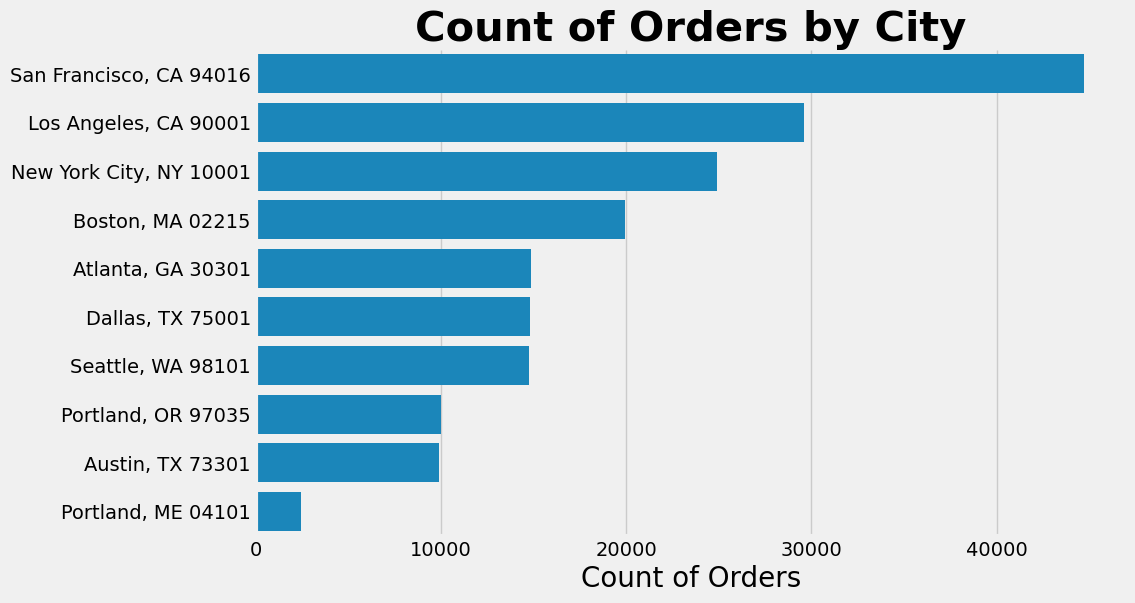

In [87]:
# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(y='City', data=cleaned_df, order=cleaned_df['City'].value_counts().index, color = "#008fd5")

# Add labels and title
plt.xlabel('Count of Orders', fontsize = 20)
plt.ylabel('')
plt.title('Count of Orders by City', fontweight = 'bold', fontsize = 30)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

In [56]:
cleaned_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Total Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,"Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,"Boston, MA 02215"
2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,"Los Angeles, CA 90001"


In [57]:
#What product sold the most
cleaned_df['Product'].value_counts()

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

In [62]:
#cleaned_df.to_excel('Cleaned_df.xlsx', index = False)
#print("Clean_df saved to excel")

#Saving the cleaned excel document in a certain position

folder_path = "~/Desktop/Projects/sales_data_analysis/"
file_name = "cleaned_df.xlsx"

file_path = folder_path + file_name

cleaned_df.to_excel(file_path, index=False)

print("Doc successfully saved")

Doc successfully saved


In [63]:
#Extracting the day of the week and storing it in a new column. '.dt.day_name()' is used to extract the name of the day from data with date.
cleaned_df['Day of the week'] = cleaned_df['Order Date'].dt.day_name()
cleaned_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Total Sales,Order Date,Purchase Address,Month,City,Day of the week
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,"Dallas, TX 75001",Friday
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,"Boston, MA 02215",Sunday
2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA 90001",Friday
3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA 90001",Friday
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,"Los Angeles, CA 90001",Tuesday


In [64]:
#Which day has the most purchases
cleaned_df['Day of the week'].value_counts()

Day of the week
Tuesday      27175
Sunday       26551
Monday       26547
Saturday     26492
Wednesday    26477
Thursday     26461
Friday       26247
Name: count, dtype: int64

In [65]:
#which product has been sold the most?
most_sold_product = cleaned_df['Product'].value_counts()
print(most_sold_product)

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64


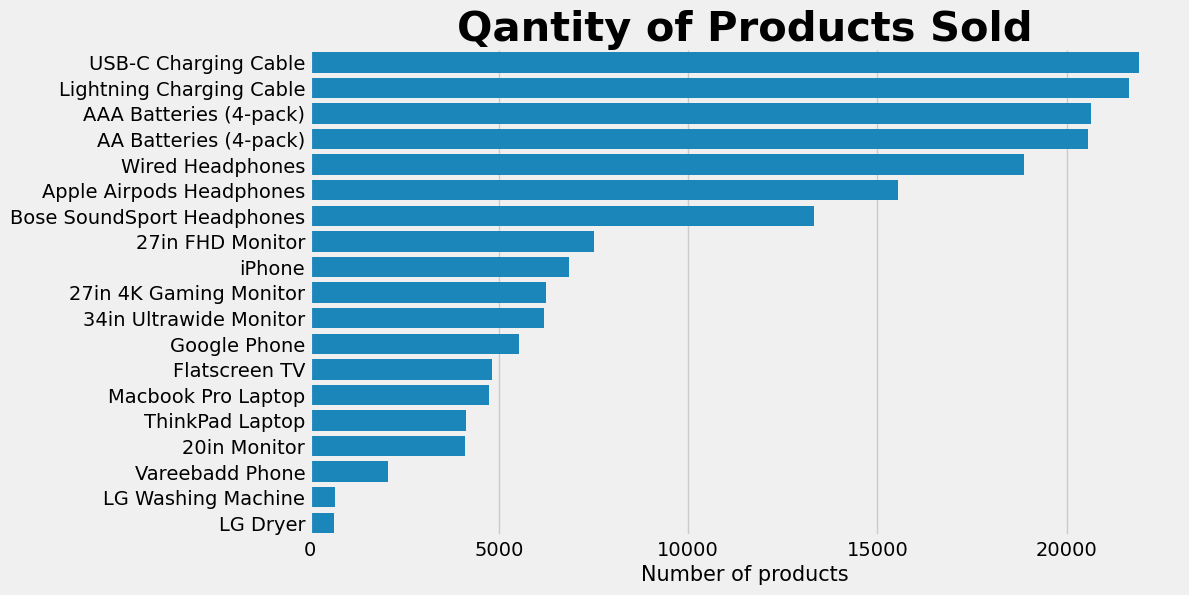

In [86]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Product', data=cleaned_df, order=most_sold_product.index, color = "#008fd5")

# Add labels and title
plt.xlabel('Number of products', fontsize = 15)
plt.ylabel('')
plt.title('Qantity of Products Sold', fontweight = 'bold', fontsize = 30)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

In [28]:
#How much has the company made in the year
total_sales = cleaned_df['Total Sales'].sum()
print(total_sales)

34492035.97


In [29]:
#How much has the company made from each product. Sorting them using '.sort_values(ascending = False)'
product_sales = cleaned_df.groupby('Product')['Total Sales'].sum()
product_sales_sorted = product_sales.sort_values(ascending = False)
print(product_sales_sorted)

Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Vareebadd Phone                827200.00
20in Monitor                   454148.71
LG Washing Machine             399600.00
LG Dryer                       387600.00
Lightning Charging Cable       347094.15
USB-C Charging Cable           286501.25
Wired Headphones               246478.43
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Name: Total Sales, dtype: float64


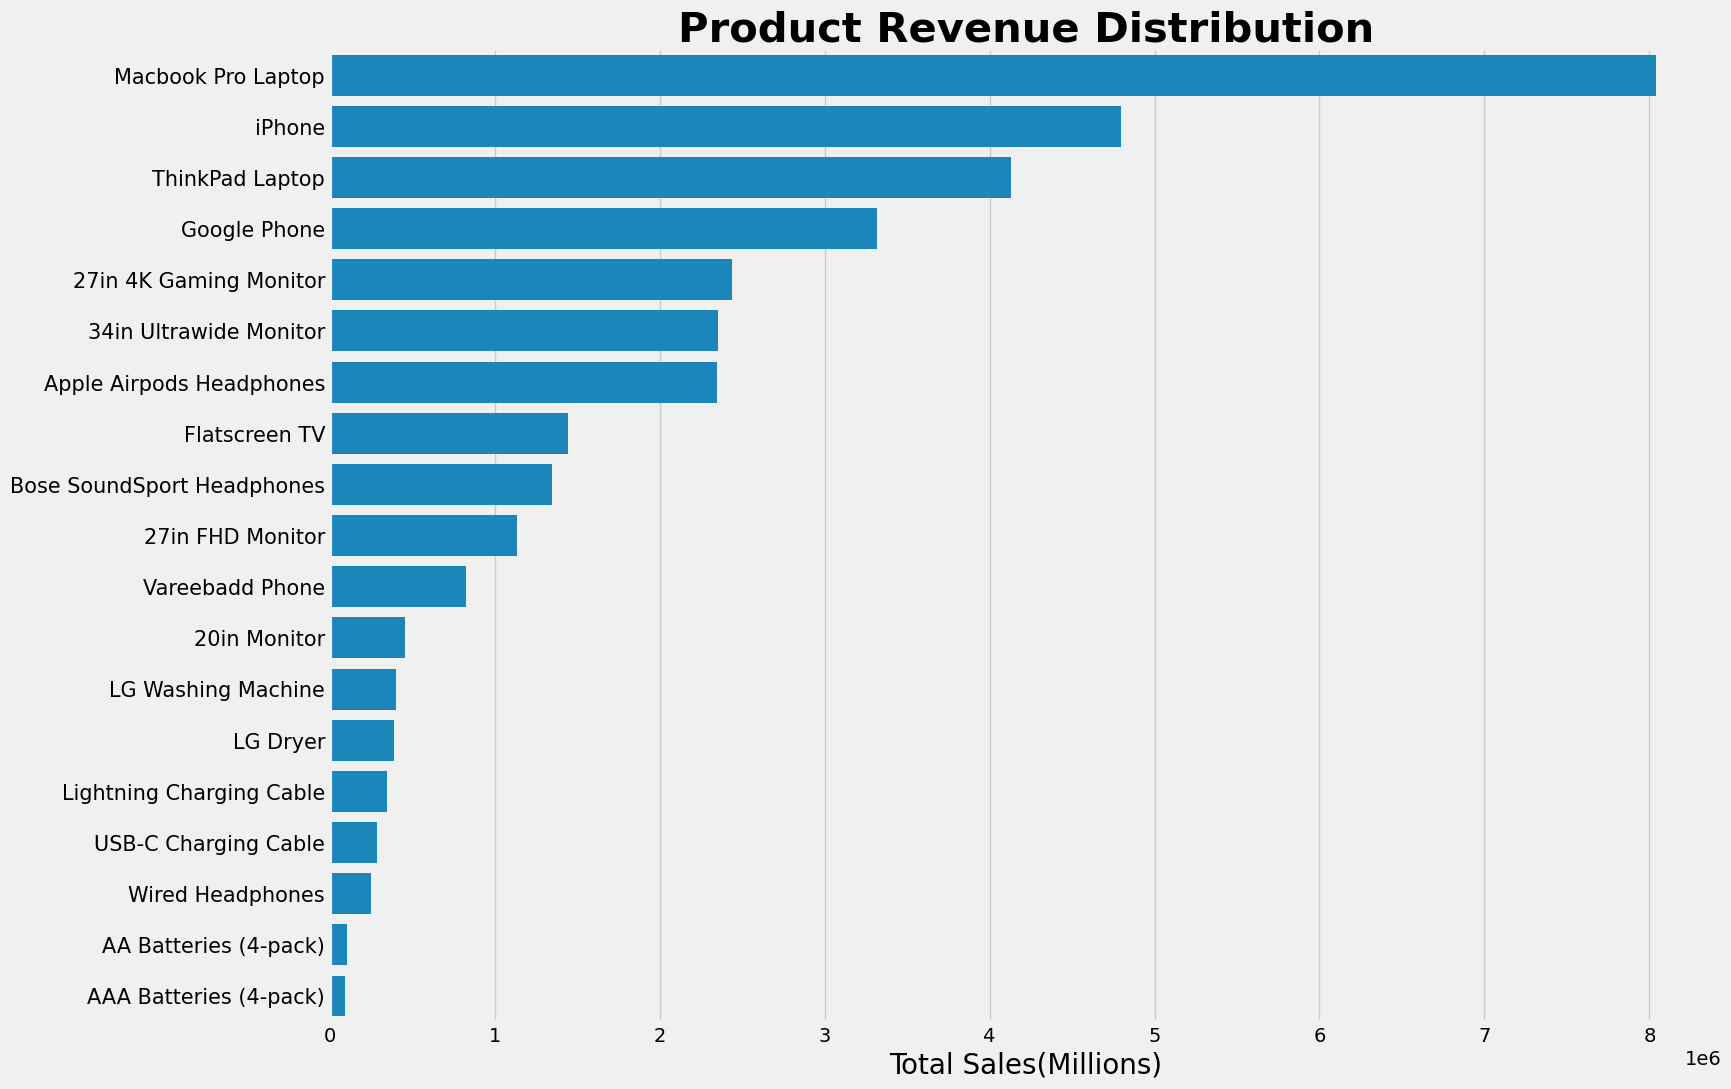

In [85]:
# Create a vertical bar plot with Seaborn
# Create a horizontal bar plot with Seaborn
plt.figure(figsize=(16, 12))
sns.barplot(x=product_sales_sorted.values, y=product_sales_sorted.index, color = '#008fd5')

# Add labels and title
plt.xlabel('Total Sales(Millions)', fontsize = 20)
plt.ylabel('')
plt.title('Product Revenue Distribution', fontweight = 'bold', fontsize = 30)

plt.yticks(fontsize = 15)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

3. What is the best time for display advertisements to maximize the likelihood of customers purchasing products?

In [88]:
#Extracting the minute and hour using their respectve attributes
cleaned_df ['Hour'] = cleaned_df['Order Date'].dt.hour
cleaned_df['Minute'] = cleaned_df['Order Date'].dt.minute

cleaned_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Total Sales,Order Date,Purchase Address,Month,City,Day of the week,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,"Dallas, TX 75001",Friday,8,46
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,"Boston, MA 02215",Sunday,22,30
2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA 90001",Friday,14,38
3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA 90001",Friday,14,38
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,"Los Angeles, CA 90001",Tuesday,9,27


In [90]:
#Combining column hour and minute
cleaned_df['Time'] = cleaned_df['Hour'].astype(str).str.zfill(2) + ':' + cleaned_df['Minute'].astype(str).str.zfill(2)

cleaned_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Total Sales,Order Date,Purchase Address,Month,City,Day of the week,Hour,Minute,Time
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,"Dallas, TX 75001",Friday,8,46,08:46
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,"Boston, MA 02215",Sunday,22,30,22:30
2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA 90001",Friday,14,38,14:38
3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA 90001",Friday,14,38,14:38
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,"Los Angeles, CA 90001",Tuesday,9,27,09:27


In [91]:
new_df = cleaned_df.groupby('Order ID')['Product'].agg(list).reset_index()
new_df

,Order ID,Product
0,141234,[iPhone]
1,141235,[Lightning Charging Cable]
2,141236,[Wired Headphones]
3,141237,[27in FHD Monitor]
4,141238,[Wired Headphones]
...,...,...
178432,319666,[Lightning Charging Cable]
178433,319667,[AA Batteries (4-pack)]
178434,319668,[Vareebadd Phone]
178435,319669,[Wired Headphones]


In [92]:
grouped_orders = new_df[new_df['Product'].apply(len) > 1]
grouped_orders

,Order ID,Product
41,141275,"[USB-C Charging Cable, Wired Headphones]"
56,141290,"[Apple Airpods Headphones, AA Batteries (4-pack)]"
131,141365,"[Vareebadd Phone, Wired Headphones]"
150,141384,"[Google Phone, USB-C Charging Cable]"
216,141450,"[Google Phone, Bose SoundSport Headphones]"
...,...,...
178302,319536,"[Macbook Pro Laptop, Wired Headphones]"
178322,319556,"[Google Phone, Wired Headphones]"
178350,319584,"[iPhone, Wired Headphones]"
178362,319596,"[iPhone, Lightning Charging Cable]"


In [93]:
#Creating a new dataframe to group orders that were bought together
grouped_orders = pd.DataFrame(grouped_orders)

In [94]:
grouped_orders

,Order ID,Product
41,141275,"[USB-C Charging Cable, Wired Headphones]"
56,141290,"[Apple Airpods Headphones, AA Batteries (4-pack)]"
131,141365,"[Vareebadd Phone, Wired Headphones]"
150,141384,"[Google Phone, USB-C Charging Cable]"
216,141450,"[Google Phone, Bose SoundSport Headphones]"
...,...,...
178302,319536,"[Macbook Pro Laptop, Wired Headphones]"
178322,319556,"[Google Phone, Wired Headphones]"
178350,319584,"[iPhone, Wired Headphones]"
178362,319596,"[iPhone, Lightning Charging Cable]"


In [95]:
#Getting to know which orders were the most orderd together.
grouped_orders['Product'].value_counts()

Product
[iPhone, Lightning Charging Cable]                                                  882
[Google Phone, USB-C Charging Cable]                                                856
[iPhone, Wired Headphones]                                                          361
[Vareebadd Phone, USB-C Charging Cable]                                             312
[Google Phone, Wired Headphones]                                                    303
                                                                                   ... 
[Google Phone, USB-C Charging Cable, USB-C Charging Cable]                            1
[ThinkPad Laptop, 27in 4K Gaming Monitor]                                             1
[iPhone, Google Phone]                                                                1
[Vareebadd Phone, 27in FHD Monitor]                                                   1
[Google Phone, USB-C Charging Cable, Wired Headphones, Apple Airpods Headphones]      1
Name: count, Length: 366